# Lesson 2 - Reference

## Basic opening files recipe

This is not the _most_ basic way but it is the _cleanest_ most basic way.

```python
file_name = "README.md" # Same dir as notebook file
with open(file_name, 'r') as file:
    file_data = file.read()
```

Once that code has run your variable `file_data` is now a string representing all of the text in the file.

You can see the contents of the file data by doing:
```python
print(file_data)
```

**The variable, `file_data`, will now have the entire contents of the file contained in one long string.**

## Breaking it out

### 1. Set your file name as a str

```python
file_name = "my_file.txt"
```

Your file can be accessed by using its exact file name as a `str`. It is often useful to set a variable as the file name instead of typing the file name directly into `open()`. Next week, we will introduce `pathlib` which allows you to more easily navigate through directories to find files that are not in the same directory as your notebook file.

### 2. The `open()` function

The function we are using is `open()`. The function, `open()` takes one mandatory argument and several optional arguments. For now, we will use the one mandatory argument, `file`, and one of the optional arguments, `mode`.
* `file` -> This is your file name. Can be a `str` or "path-like object" (more next week)
* `mode` -> There are four basic modes:
    * `'r'` - Reading (text) mode
    * `'w'` - Writing (text) mode
    * `'rb'` - Reading binary mode
    * `'wb'` - Writing binary mode
    * We will just be using `'r'` and/or `'w'`. If you do not put a `mode` argument, Python will assume it is `'r'`
    
When you call the `open()` function with mode `'r'`, Python returns to you a `TextIOWrapper` (what???). Don't worry about it. It's basically a kind of like a pipeline between the file data on disk to the file data in the memory of your Python session. It also "holds" the connection to the file open until you explicitly close the file.

### 3. Using `with ___ as ___:`

Opening a file like this:
```python
with open(file_name) as file:
    file_data = file.read()
```

Is roughly equivalent to doing this:

```python
file = open(file_name)
file_data = file.read()
file.close()
```

What's the difference? When using the `with ... as ...:` approach, you do not have to manually close the file. It's done automatically for you as soon as your code "exits" the indented "with block". Why is this important? If there is an error caused by the line `file_data = file.read()`, the file will close first before Python raises the error.

If you do not use the `with ... as ...:`, then the file will remain open after the error is thrown (and you might not be able to open it later in Windows unless it is closed).

You do not _have_ to use the `with ... as ...` (which is also called a "context manager") to open files but everyone in the Python world does so you can expect to commonly see it in other people's code. If you start working with database files, which get REALLY picky about being left open or not, then context managers are really the only way to go. It's a good habit to get used to using them.

# Python strings: `str`

A string is a collection of individual characters.

* Strings are created by putting anything into quotes, `''` or `""`
   * `'COL300x400'`
   * `"12340.03"`
   * `"This is a string! 🚀"`
   * `"print(2 + 4*3)"`
   * `"" # <- This is an empty string`
* Strings (and almost anything in Python), can be assigned to a variable
    * `column_spec = 'COL300x400'`
    * `function_call_example = "print(2 + 4*3)"`

Now, in the above examples, the variable name is a symbol that represents the string

Strings have some special characters that are known as "escaped" characters. Escaped characters start with a backslash `\`. It's like you are using a backslash to communicate you want to write a special character, such as one of the characters below:

* `'\n'`: New line character
* `'\t'`: Tab character
* `'\r'`: Carriage return character (brings the "cursor" to the "beginning of the line")
* `'\b'`: Backspace

To actually write a backslash in your string, you have to "escape" the backslash: `"\\"`

## Types of strings

### Raw string ("r-string")

This string shows how you need to escape backslashes to actually write a backslash (mostly pertinent for writing Windows paths, all other computer systems use forward-slash, which causes no problems).

```python
file_path = "C:\\Users\\cferster\\my_file.txt"
print(file_path)
```

This is a raw string. You create a raw string by putting an `r` right before your first quotation mark. Notice how backslashes are just typed like you would normally see in a Windows file path. They have _not_ been escaped.

```python
file_path = r"C:\Users\cferster\my_file.txt"
```

Sometimes, especially with Windows paths, using a raw string can be convenient. However, to put tabs or newline characters into the string, you should use a normal string with escaped characters `\t` and `\n`, respectively.

### Multi-line string

You can write a paragraph of text over multiple lines when you use multi-line strings. 

Multi-line strings are created by using triple quotes, either `'''` or `"""`.

Example:

```python
"""This is a string
written over
several lines.
"""
```

```python
my_multi_line_string = '''
This 
works
too.
'''

print(my_multi_line_string)
```

### Formatted string ("f-string")

Put an `f` at the beginning of your quotes to make an "f-string". If you have want to display the _value_ of a variable or the result of a Python expression in your string, put the variable or expression in braces, `{ }`

```python
b = 300
h = 460

col_section = f"COL{b}x{h}"
print(col_section)
```

```python
b = 300
h = 460

col_section = f"COL{b - 100}x{h - 220}"
print(col_section)
```



# Python lists: `list`

A list is a collection for any kind of items.

* Lists are created by putting items in square brackets: `[]`
   * `beam_sections = ["215x608-24fE", "315x836-24fEx", "315x722-24fE"]`
   * `fc_values = [30, 35, 40, 45]`
   * `mixed_values = ["COL", 34]`
   * `list_of_lists = [fc_values, mixed_values]`

# Similarity between `str` objects and `list` objects

## 1. Concatenation (adding items) with `+` and `*`

Both strings and lists can be operated on with `+` and `*`

* String examples
   * `"COLUMN" + "C35"` - Returns `"COLUMNC35"`
   * `"BEAM" * 3` - Returns `"BEAMBEAMBEAM"`
* List examples
   * `["COL300x600FC45", "COL300x900FC45"] + ["COL600x800FC60"]` - Returns `["COL300x600FC45", "COL300x900FC45", "COL600x800FC60"]`
   * `['beam', 'column'] * 3` - Returns `['beam', 'column', 'beam', 'column', 'beam', 'column']`

## 2. Indexing: Accessing items in collections

* Syntax: `[start: stop: step]`
    * `start` is inclusive (i.e. starts on, and includes, this index)
    * `stop` is exclusive (i.e. stops _before_ this index)
    * All three arguments (`start`, `stop`, `step`) are optional
        * `[:]` will return the sequence (as a copy)
        * `[1:]` will start at `1` and go to the end
        * `[:4]` will start at the beginning and stop before `4`
        * `[::2]` will start at the beginning and go to the end returning every 2nd item
* First item is always `0` (not `1`, `1` is the second item)
* Last item can be accessed with `-1`
* Examples with string:
    * `column_section = "COL300x400FC45"`
    * `column_section[3:6]` - Returns `'300'`
    * `column_section[7:10]` - Returns `'400'`

* Examples with list:
    * `beam_spans = [3000, 6000, 9000, 12000]`
    * `beam_sections[2]` - Returns `[9000]`
    * `beam_sections[0:2]` - Returns `[3000, 6000]`
    * `beam_sections[2:]` - Returns `[9000, 12000]`
    

By using the `step` indexer, you can adjust the order of how items are indexed.

   * Positive values for `step` e.g. `1`, `2`, `3` will return every value, every second value, every third value (respectively)
   * Negative values for `step` e.g. `-1`, `-2`, `-3` will reverse the list and then return every value (from back to front), every second value (from back to front), every third value (from back to front)
   
* Examples with strings:
   * `column_section = "COL300x400FC45"`
   * `column_section[0:-1:2]` - Returns `'CL0x0F4'`
   * `column_section[5:2:-1]` - Returns `'003'`
   
* Examples with lists:
    * `beam_spans = [3000, 6000, 9000, 12000]`
    * `beam_spans[::-1]` - Returns `[12000, 9000, 6000, 3000]`
    * `beam_spans[::2]` - Returns `[6000, 12000]`

## 3. Methods

A _method_ is a function that is bundled with an object (object: anything you can assign to a variable in Python). The method is a function that operates on that particular object. You can think of it kind of like a regular function but one that already has the data and "knowledge" of the object it is attached to.

All `str` objects will have access to the `str` methods and they will operate on the particular `str` object you call them on.

All `list` objects will have access to the `list` methods and they will operate on the particular `list` object you call them on.

### Using "auto-complete" to discover method names

On _any_ Python object, you can see the list of _methods_ in Jupyter by using the `.` notation and then hitting the `[Tab]` key.

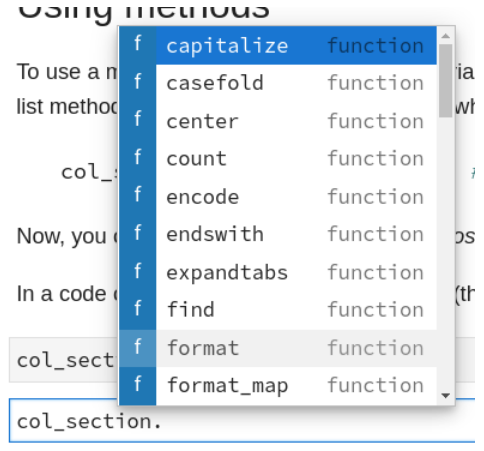

You can click on any of the options and they will auto-complete for you. You can also type it out.

### Discover method parameters (inputs) by using `[Shift]+[Tab]`

Once you have typed the method name, type an open paren `(`, to start "calling" the method, and then press `[Shift]+[Tab]` (together) to see a helpful window on how to use the method.

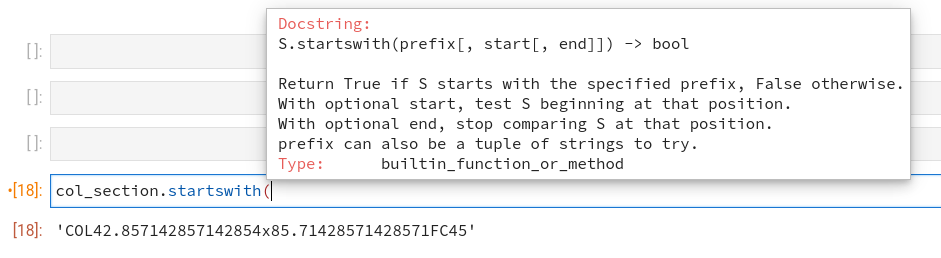

## String methods

An incomplete list of methods (there are many). **Bold ones** are the ones to remember at first.

| Transformation (alters the string and returns a new one)         | Testing (returns `True` or `False`)   | Investigation (returns information about the string)     | Creating (returns a new string from other data)|
| ---------------           | --------------           | ----------------- | ------------------| 
| `.upper()`                | `.isalpha()`             | `.count(sub_str=)`| `.format(var=)`     
| `.lower()`                | `.isalnum()`             | `.find(sub_str=)` | `.join(iterable=)` 
| `.capitalize()`           | `.isdigit()`             | `.rfind(sub_str=)`|    
| `.title()`                | `.islower()`             | 
| `.strip()`                | `.isupper()`             |  
| `.lstrip()`               | `.startswith(sub_str=)`   
| `.rstrip()`               | `.endswith(sub_str=)`   
| **`.replace(old=, new=)`**    | 
| **`.split(sub_str=)`**

## List methods

Again, **bold** method names are the ones to remember.

| Transformation (alters the list)  | Investigation (returns information about the list) | Creating/Editing (add, remove items from the list)|
| ---------------- | ----------------- | ------------------| 
| `.reverse()`     | `.count(item=)`   | **`.append(item=)`**     
| **`.sort()`**        | `.index(item=)`   | `.extend(iterable=)`
|                  |                   | **`.insert(index, item)`**
|                  |                   | **`.pop(index=)`**
|                  |                   | `.remove(item=)`
|                  |                   | `.clear()`
|                  |                   | `.copy()`

# Examples of useful list methods

* `.append(item)` - Adds an item to the end of the list. This is probably the most used `list` method
* `.insert(index, item)` - Adds an item at the index position
* `.pop(index)` - Remove item at the index position from the list and returns the item

e.g.
```python
my_list = ["col", "beam", "slab"]

my_list.append("arch")
print(my_list) # ["col", "beam", "slab", "arch"]

my_list.insert(1, "cantilever")
print(my_list) # ["col", "cantilever", "beam", "slab", "arch"]

my_list.pop() # without an argument, removes the last item
print(my_list) # ["col", "cantilever", "beam", "slab"]

my_list.pop(0) # Pass an index and the item at that index will be removed from the list
print(my_list) # ["cantilever", "beam", "slab"]

```

## Examples of useful string methods

### `.replace()`

Use `.replace()` to replace a substring within a string with another substring.

e.g.

```python
beam_section = "315x836-24fEx"
beam_section = beam_section.replace("836", "798")
print(beam_section)

# Or...

beam_section = beam_section.replace("Ex", "")
print(beam_section)
```

### `.split()`

Use `.split()` to split parts of the string up into a `list`. Pass an optional argument to `.split()` to tell it what substring to split on.

Run the code below chunk by chunk to see how it works.

e.g.

```python
beam_section = "315x836-24fEx"
dimensions_grade = beam_section.split('-')
print(dimensions_grade)

dimensions = dimensions_grade[0]
print(dimensions)

width_depth = dimensions.split("x")
print(width_depth)

width = width_depth[0]
depth = width_depth[1]
print(width)
print(depth)
```

## `.strip()`

Use `.strip()` when you want to remove leading and trailing characters from a string. If you give no arguments to `.strip()`, it will remove white space. If you give it any combination of characters, it will _any_ of those characters instead.

e.g.

```python
col_section_raw = "  def  200x622-24fE    df"
col_section_raw.strip() # Removes spaces at the beginning of the string -> 'def  200x622-24fE    df'
col_section_raw.strip('fed ') # Removes the characters f, e, d,  , from the beginning of the string -> '200x622-24fE'
```